# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #8399dcff; color: #2c29e0ff; padding: 12px; line-height: 0.7;">Import Library</div></center>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import statsmodels.api as sm

In [14]:
import os

print("Lokasi kerja sekarang:", os.getcwd())
print("Isi folder:", os.listdir())


Lokasi kerja sekarang: c:\Users\HASRAH TASKIA Z\OneDrive\文档\Visualisasi Plot 3D\visualisasi Plot 3D
Isi folder: ['.git', 'BTC-USD-5Tahun2019.csv', 'Data_Regresi.csv', 'Gambar 3D', 'regresi (Data BTC 2010-2019).ipynb', 'regresi (Data Regresi.csv).ipynb', 'regresi data random.ipynb']


# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #8399dcff; color: #2c29e0ff; padding: 12px; line-height: 0.7;">Baca Data CSV</div></center>

In [15]:
import pandas as pd

df = pd.read_csv("Data_Regresi.csv")
print(df.head())


   TIME  Promo(X1)  Karyawan(X2)  Jual(Y)
0     1        248            42     1705
1     2        210            35     1682
2     3        207            32     1663
3     4        153            33     1628
4     5        169            28     1650


# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #8399dcff; color: #2c29e0ff; padding: 12px; line-height: 0.7;">Regresi Sederhana</div></center>

alpha = 1519.3107243211807
beta = 0.7395013337526964


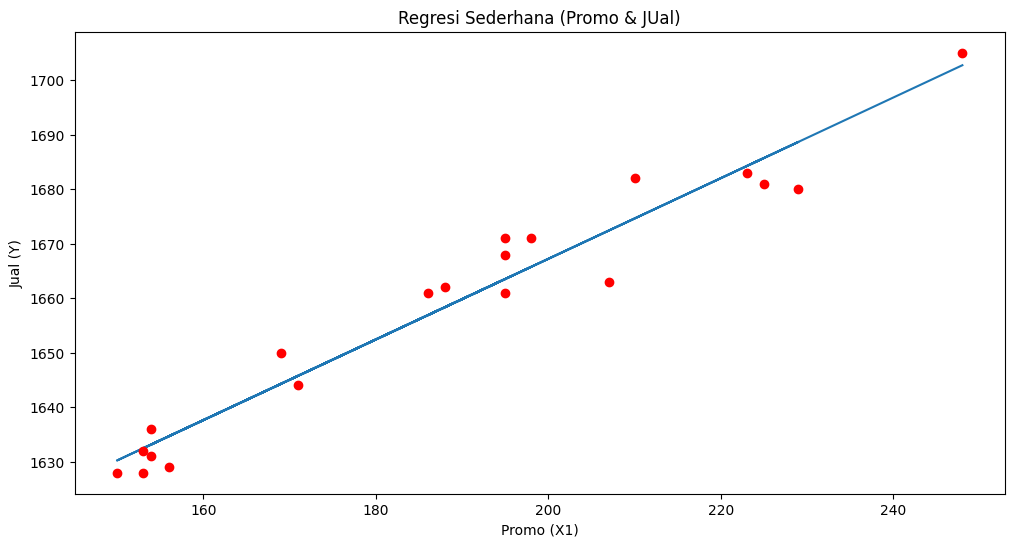

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# baca data
df = pd.read_csv("Data_Regresi.csv")

# variable
x = df["Promo(X1)"]
y = df["Jual(Y)"]

# hitung mean
xmean = np.mean(x)
ymean = np.mean(y)

# hitung covariance dan variance
df["xycov"] = ( x - xmean) * ( y - ymean)
df["xvar"] = ( x - xmean)**2

# hitung beta and alpha
beta = df["xycov"].sum() / df["xvar"].sum()
alpha = ymean - (beta*xmean)
print(f"alpha = {alpha}")
print(f"beta = {beta}")

# fungsi prediksi
ypred = alpha + beta * x   

# plot regression against actual ata
plt.figure(figsize=(12, 6))
plt.plot(x, ypred)
plt.plot(x, y, "ro")
plt.title("Regresi Sederhana (Promo & JUal)")
plt.xlabel("Promo (X1)")
plt.ylabel("Jual (Y)")

plt.show()

# <center><div style="font-family: Times New Roman; font-size: 30px; border-radius : 10px; background-color: #8399dcff; color: #2c29e0ff; padding: 12px; line-height: 0.7;">Visualisasi (scatter 3D)</div></center>

In [17]:
import pandas as pd
import statsmodels.api as sm

# baca data
df = pd.read_csv("Data_Regresi.csv")

# variable x dan y
x = df[["Promo(X1)", "Karyawan(X2)"]]
y = df["Jual(Y)"]

# menambahkan konstanta
x = sm.add_constant(x)

# fit model
model = sm.OLS(y, x). fit()

# koefisien 
koefisien = model.params

print("\nHasil Regresi Berganda (Promo & Karyawan → Jual):")
print(koefisien)


Hasil Regresi Berganda (Promo & Karyawan → Jual):
const           1514.853495
Promo(X1)          0.738604
Karyawan(X2)       0.132930
dtype: float64


In [18]:

import pandas as pd
import numpy as np
import plotly.graph_objects as go

# baca data
df = pd.read_csv("Data_Regresi.csv")

# scatter plot 3d
scatter_plot = go.Scatter3d(
    x=df["Promo(X1)"],
    y=df["Karyawan(X2)"],
    z=df["Jual(Y)"],
    mode="markers",
    marker=dict(size=5, color="blue", opacity=0.8),
    name="Data"
)

# membuat gird untuk bidang regresi
x1_grid, x2_grid = np.meshgrid(
    np.linspace(df["Promo(X1)"].min(), df["Promo(X1)"].max(), 10),
    np.linspace(df["Karyawan(X2)"].min(), df["Karyawan(X2)"].max(), 10)
)

y_pred = koefisien.iloc[0] + koefisien.iloc[1] * x1_grid + koefisien.iloc[2] * x2_grid

# membuat permukaran regresi
regresion_surface = go.Surface(
    x=x1_grid, y=x2_grid, z=y_pred,
    colorscale="greens", opacity=0.5,
    name="Bidang Regresi"
)

# membuat layout plot
layout = go.Layout(
    title="Regresi Berganda: Promo & Karyawan → Jual",
    scene=dict(
        xaxis_title="Promo (X1)",
        yaxis_title="Karyawan (X2)",
        zaxis_title="Jual (Y)"
    ),
    showlegend=True
)

# membuat figure
fig = go.Figure(data=[scatter_plot, regresion_surface], layout=layout)

# menampilkan figure
fig.show()